# 쇼핑몰 지점별 매출액 예측 경진대회 

<img src='https://user-images.githubusercontent.com/92353013/177723710-5b62e89f-f46b-4575-b356-f2899e288017.png' align=center>

## [기존 결과를 개선한 버전(Scaling, RandomForest 사용)]

## 1. 데이터 살펴보기

주어진 데이터를 살펴보며 데이터의 형태 & 내용 파악 > 분석 방향 잡기

---

### dataset

- train.csv : 모델 학습용 데이터
- test.csv : (학습시킨 모델을 이용) 정답 예측용 데이터
- sample_submission.csv : 예측한 정답을 기록, 샘플 정답 파일(제출용)


## 1.1 데이터 불러오기 : **read_csv()**

**pandas** 라이브러리의 `read_csv()` 함수 > 사용할 데이터 불러오기



In [2]:
# import padas library
import pandas as pd

# import data
train = pd.read_csv('dataset/dataset-1/train.csv')
test = pd.read_csv('dataset/dataset-1/test.csv')
sample_submission = pd.read_csv('dataset/dataset-1/sample_submission.csv')

In [3]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


## 1.2 데이터 확인하기 : **head(), tail(), info()**

처음과 끝을 체크 > 어떤 종류의 데이터들로 이뤄졌는지 알아보고 이상치나 결측치 존재 확인

In [4]:
# train 데이터 중 맨 위 5줄 보여주기 
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [5]:
# train 데이터 중 맨 아래 5줄 보여주기 
train.tail()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20
6254,6255,45,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,8.684,False,713173.95


In [6]:
# train 데이터 속 칼럼들의 정보(타입, 결측치) 확인
# Non-Null Count : 전체 데이터(6255개) 중 null값이 아닌 데이터 수 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


In [7]:
# 매출액을 기준으로 데이터 정렬 > 지점별 매출액 범위 확인
train.sort_values(by='Weekly_Sales')

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
4491,4492,33,03/12/2010,52.82,3.041,NaN,NaN,NaN,NaN,NaN,9.265,False,209986.25
4486,4487,33,29/10/2010,71.34,3.130,NaN,NaN,NaN,NaN,NaN,9.265,False,213538.32
4547,4548,33,30/12/2011,51.60,3.428,384.37,1919.79,4.95,25.2,556.38,8.010,True,215359.21
4495,4496,33,31/12/2010,52.91,3.148,NaN,NaN,NaN,NaN,NaN,9.265,True,219804.85
4543,4544,33,02/12/2011,59.12,3.701,0.50,NaN,4.00,NaN,1280.77,8.010,False,220060.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,1715,13,24/12/2010,34.90,2.846,NaN,NaN,NaN,NaN,NaN,7.795,False,3595903.20
515,516,4,23/12/2011,35.92,3.103,2461.94,69.05,2938.24,52.0,4396.76,5.143,False,3676388.98
1297,1298,10,24/12/2010,57.06,3.236,NaN,NaN,NaN,NaN,NaN,9.003,False,3749057.69
2687,2688,20,24/12/2010,25.17,3.141,NaN,NaN,NaN,NaN,NaN,7.484,False,3766687.43


In [8]:
# 결측치가 존재하는 promotion 칼럼 자세히 살펴보기 : describe()
train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']].describe()

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5
count,2102.000000,1592.000000,1885.000000,1819.000000,2115.000000
mean,7155.930661,3308.125810,1462.535523,3465.952501,4518.993173
std,8408.206085,9382.823804,9667.580258,6413.116294,6048.661908
min,0.270000,-265.760000,-29.100000,0.410000,135.160000
25%,1844.295000,39.755000,4.700000,499.895000,1742.305000
50%,5221.140000,205.410000,24.600000,1532.630000,3226.410000
75%,9199.242500,1931.005000,104.010000,3640.905000,5444.030000
max,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000


### dataset

1. train.csv (칼럼 : 13개)

```
id : 샘플 아이디
Store : 쇼핑몰 지점
Date : 주 단위(Weekly) 날짜
Temperature : 해당 쇼핑몰 주변 기온
Fuel_Price : 해당 쇼핑몰 주변 연료 가격
Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보
Unemployment : 해당 쇼핑몰 지역의 실업률
IsHoliday : 해당 기간의 공휴일 포함 여부
Weekly_Sales : 주간 매출액 (목표 예측값)
```

2. test.csv (칼럼 : 12개)

- train.csv의 마지막 칼럼 제외하고 칼럼 구성 같음
    
    
3. sample_submission.csv (칼럼 : 2개)
- id : 샘플 아이디
- Weekly_Sales : 주간 매출액 (목표 예측값)

---

### 유추할 수 있는 정보


- 쇼핑몰 지점: 45개
- 조사 기간: 2010. 5. ~ 2012.9.
- 지점마다 매출 차이가 꽤 있음(209986.25 ~ 3818686.45)
<br>

- promotion1~5 부분에 결측치가 존재
- Date, isholiday 칼럼 데이터는 숫자타입이 아님 > 데이터 전처리 필요


## 1.3 데이터 시각화 : **matplotlib**

**matplotlib** 라이브러리 > 그래프를 그려 데이터 시각화

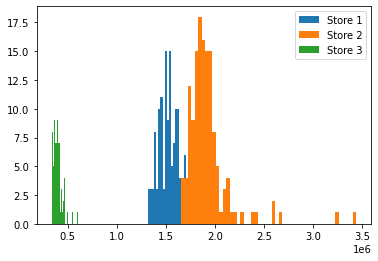

In [9]:
import matplotlib.pyplot as plt

# 예측해야 하는 값인 지점별 weekly_sales 데이터 시각화
# 지점마다 매출액 차이가 큰 상황
plt.hist(train[train.Store==1].Weekly_Sales, bins=50)
plt.hist(train[train.Store==2].Weekly_Sales, bins=50)
plt.hist(train[train.Store==3].Weekly_Sales, bins=50)
plt.legend(['Store 1','Store 2','Store 3'])
plt.show()

## 2. 데이터 전처리

데이터를 정확하게 분석할 수 있도록 데이터에 여러가지 처리를 하는 과정

## 2.1 결측치(NA) 처리 : fillna()

**결측치** : 관측되지 않아 아무것도 없는 공간으로 된 데이터 (0이 아님)

- 분석을 위해 이 데이터를 무언가로 체우거나 처리해야 함
<br>e.g. 0으로 채우기


In [10]:
# fillna(0) : NA 데이터를 0으로 채우기
train = train.fillna(0)

train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [11]:
train.info() # NA > 0 으로 처리됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    6255 non-null   float64
 6   Promotion2    6255 non-null   float64
 7   Promotion3    6255 non-null   float64
 8   Promotion4    6255 non-null   float64
 9   Promotion5    6255 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


## 2.2 Date 전처리

Date(날짜 정보) 칼럼은 문자 정보이기 때문에 숫자로 변환 처리해줘야 함
> 여기서는 Date 중 월 정보만 사용하도록 전처리

In [13]:
# date 칼럼에서 년,월,일 정보 숫자 변환 > 각 정보를 담는 새로운 칼럼 생성
def date_encoder(date):
    day, month, year = map(int, date.split('/'))
    return day, month, year

# 칼럼 생성
train['Day'] = train['Date'].apply(lambda x: date_encoder(x)[0])
train['Month'] = train['Date'].apply(lambda x: date_encoder(x)[1])
train['Year'] = train['Date'].apply(lambda x: date_encoder(x)[2])
# 주간 데이터에서 일 정보는 불필요 >  칼럼을 제거
train = train.drop(columns=['Day', 'Date'])
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,5,2,2010
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,12,2,2010
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,19,2,2010
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,26,2,2010
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,31,8,2012
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,7,9,2012
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,14,9,2012
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,21,9,2012


## 2.3 IsHoliday 전처리

- IsHoliday : 휴일일 때 : True, 휴일이 아닐 때 : False
> IsHoliday 칼럼 값을 변환<br>
True > 1, Flase > 0 전처리

In [ ]:
def holiday_to_num(isholiday):
    if isholiday == True:
        number = 1
    else:
        number = 0
    return number

train['NumberHoliday'] = train['IsHoliday'].apply(holiday_to_num)

train

In [ ]:
# testset도 동일한 전처리 적용
test = test.fillna(0)

test['Month'] = test['Date'].apply(get_month)

# IsHoliday 전처리
test['NumberHoliday'] = test['IsHoliday'].apply(holiday_to_num)

test.info()

## 3. Modeling

전처리한 데이터로 모델을 학습, 예측해보기

## 3.1 모델 선택 : 선형 회귀 모델

### **선형회귀(Linear Regression)**

예측하고자 하는 종속 변수 y와 독립 변수 x의 관계를 가장 잘 나타내는 선을 구하는 **회귀분석** 방법

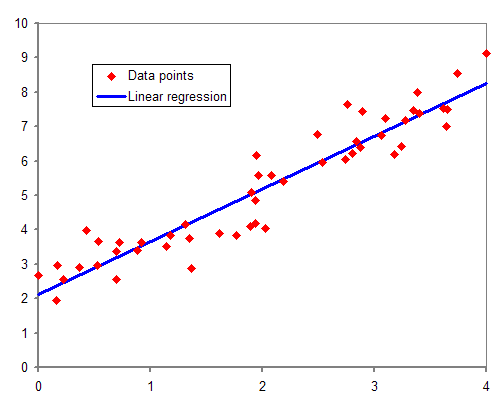
- 파란 선 : 예측 값(빨간 점들이 나타내는 x y 관계) / 빨간 점 : 실제 데이터
- x 값이 증가할수록 y 값도 증가하는 관계
- 새로운 x 값이 추가될 때, 이에 해당하는 y값은 어느 정도일지 예측가능

In [ ]:
# 모델 선언 : sklearn 패키지 이용
from sklearn.linear_model import LinearRegression

model = LinearRegression()

## 3.2 모델 학습
선언한 모델을 사용하여 (훈련용) 데이터셋을 학습하기

In [ ]:
# 1. 분석에 필요 없는 칼럼 데이터 제거
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

# 2. 전처리 작업 전 칼럼 데이터 제거
train = train.drop(columns=['Date', 'IsHoliday'])
test = test.drop(columns=['Date', 'IsHoliday'])

# 3. 기존 train set을 학습용(x)과 예측값(y)으로 분리

x_train = train.drop(columns = ['Weekly_Sales'] )
y_train = train[['Weekly_Sales']]

In [ ]:
# 4. 모델 학습하기
model.fit(x_train, y_train)

## 3.3 예측 : predict()
학습된 모델을 통해 test set의 예측값(y) 구하기

In [ ]:
pred = model.predict(test)
print('예측된 데이터 중 상위 10개 값 확인')
print(pred[:10])

## 4. 제출 파일 생성, 제출하기
예측한 값을 sample_submission.csv 에 저장, 제출하기

In [ ]:
# 예측값을 정답 파일에 저장
sample_submission['Weekly_Sales'] = pred

sample_submission.head()

In [ ]:
# csv 파일 형태로 저장
sample_submission.to_csv('submission.csv', index = False)